In [60]:
pip install numpy pandas nltk textblob matplotlib seaborn plotly gensim pyLDAvis scikit-learn PyMuPDF wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install PyMuPDF==1.22.5


In [62]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from nltk.corpus import cmudict
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import string
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import fitz

# Download necessary NLTK data files
nltk.download('cmudict')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\naimi\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naimi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
df_DRHP = pd.read_csv('Path_To_CSV')
df_DRHP.head()

<>:1: DeprecationWarning:

invalid escape sequence '\R'

<>:1: DeprecationWarning:

invalid escape sequence '\R'

C:\Users\naimi\AppData\Local\Temp\ipykernel_23444\2232011872.py:1: DeprecationWarning:

invalid escape sequence '\R'



,General Information,Risk Factors,Introduction,About Our Company,Financial Information,Legal and Other Information,Our Group Companies,Other Regulatory and Statutory Disclosures,Offer Information,Description of Equity Shares and Terms of Articles of Association,Other Information,company_name,file_name
0,NaN,internal accruals of our Company or means othe...,NaN,NaN,Financial Information)\nWe fund a majority of ...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown Company,1722926461857.PDF
1,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III: INTRODUCTION .......................,SECTION IV – ABOUT OUR COMPANY ..................,SUMMARY OF RESTATED CONSOLIDATED FINANCIAL INF...,SECTION VI: LEGAL AND OTHER INFORMATION .........,NaN,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,NaN,SECTION VIII: DESCRIPTION OF EQUITY SHARES AND...,SECTION IX – OTHER INFORMATION ..................,ARISINFRA SOLUTIONS LIMITED,1723620609645_396.pdf
2,GENERAL INFORMATION .............................,unless they can afford to take the risk of los...,SECTION III: INTRODUCTION .......................,SECTION IV: ABOUT OUR COMPANY ...................,SUMMARY OF RESTATED FINANCIAL INFORMATION .......,SECTION VI: LEGAL AND OTHER INFORMATION .........,SECTION VII: OUR GROUP COMPANIES ................,“Other Regulatory and Statutory Disclosures –\...,SECTION IX: OFFER INFORMATION ...................,NaN,SECTION XI: OTHER INFORMATION ...................,INTERNATIONAL GEMMOLOGICAL INSTITUTE (INDIA) L...,1724758229418_433.pdf
3,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III – INTRODUCTION ......................,SECTION IV: ABOUT OUR COMPANY ...................,"CERTAIN CONVENTIONS, USE OF FINANCIAL INFORMAT...",SECTION VI – LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,"of ₹1 each million details, see “Other Regulat...",NaN,NaN,SECTION IX – OTHER INFORMATION ..................,HEXAWARE TECHNOLOGIES LIMITED,1726227537582.pdf
4,GENERAL INFORMATION .............................,they can afford to take the risk of losing the...,SECTION III – INTRODUCTION ......................,SECTION IV- ABOUT OUR COMPANY ...................,SUMMARY FINANCIAL INFORMATION ...................,SECTION VI - LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,SECTION VII - OFFER INFORMATION .................,NaN,SECTION IX – OTHER INFORMATION ..................,KUMAR ARCH TECH LIMITED,1727928892777.pdf


In [64]:
columns_to_analyze = ['Risk Factors', 'Introduction', 'About Our Company', 'Financial Information', 
                      'Legal and Other Information', 'Offer Information']

In [65]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove numbers and special characters
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    # Tokenize words
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words  # Return tokenized words as a list

# Apply preprocessing to the Combined_Text column
df_DRHP['Combined_Text'] = df_DRHP[columns_to_analyze].fillna('').apply(lambda row: ' '.join(row), axis=1)
df_DRHP['Tokenized_Text'] = df_DRHP['Combined_Text'].apply(preprocess_text)

# View the updated DataFrame
print(df_DRHP[['Combined_Text', 'Tokenized_Text']].head())

                                       Combined_Text  \
0  internal accruals of our Company or means othe...   
1  the risk of losing their entire investment. In...   
2  unless they can afford to take the risk of los...   
3  the risk of losing their entire investment. In...   
4  they can afford to take the risk of losing the...   

                                      Tokenized_Text  
0  [internal, accruals, company, means, net, proc...  
1  [risk, losing, entire, investment, investors, ...  
2  [unless, afford, take, risk, losing, entire, i...  
3  [risk, losing, entire, investment, investors, ...  
4  [afford, take, risk, losing, entire, investmen...  


In [66]:
d = cmudict.dict()

# Custom list of common financial terms to exclude from complex word counting
common_financial_terms = {"investment", "financial", "operation", "management", "liability", "corporation", 
                          "securities", "revenue", "capital", "assets", "liabilities", "institutional", "regulatory"}

# Function to count syllables in a word
def syllable_count(word):
    try:
        return [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
    except KeyError:
        # If word not found in cmudict, estimate by counting vowels
        return sum(1 for char in word if char in "aeiouAEIOU")

# Function to calculate the adjusted Fog Index, excluding common financial terms
def calculate_fog_index_adjusted(text):
    cleaned_text = preprocess_text(text)
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    num_sentences = len(sentences)
    num_words = len(words)
    
    # Average Sentence Length (ASL)
    asl = num_words / num_sentences if num_sentences > 0 else 0
    
    # Identify complex words (3+ syllables) excluding common financial terms
    complex_words = [word for word in words if syllable_count(word) >= 3 and word.lower() not in common_financial_terms]
    num_complex_words = len(complex_words)
    
    # Percentage of Hard Words (PHW)
    phw = (num_complex_words / num_words) * 100 if num_words > 0 else 0
    
    # Fog Index calculation
    fog_index = 0.4 * (asl + phw)
    
    return fog_index


# Apply the Fog Index calculation to each column
for column in columns_to_analyze:
    df_DRHP[f'{column}_Fog_Index'] = df_DRHP[column].fillna('').apply(calculate_fog_index_adjusted)

df_DRHP.head()

,General Information,Risk Factors,Introduction,About Our Company,Financial Information,Legal and Other Information,Our Group Companies,Other Regulatory and Statutory Disclosures,Offer Information,Description of Equity Shares and Terms of Articles of Association,...,company_name,file_name,Combined_Text,Tokenized_Text,Risk Factors_Fog_Index,Introduction_Fog_Index,About Our Company_Fog_Index,Financial Information_Fog_Index,Legal and Other Information_Fog_Index,Offer Information_Fog_Index
0,NaN,internal accruals of our Company or means othe...,NaN,NaN,Financial Information)\nWe fund a majority of ...,NaN,NaN,NaN,NaN,NaN,...,Unknown Company,1722926461857.PDF,internal accruals of our Company or means othe...,"[internal, accruals, company, means, net, proc...",27.50,0.00,0.00,28.46,0.00,0.00
1,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III: INTRODUCTION .......................,SECTION IV – ABOUT OUR COMPANY ..................,SUMMARY OF RESTATED CONSOLIDATED FINANCIAL INF...,SECTION VI: LEGAL AND OTHER INFORMATION .........,NaN,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,NaN,SECTION VIII: DESCRIPTION OF EQUITY SHARES AND...,...,ARISINFRA SOLUTIONS LIMITED,1723620609645_396.pdf,the risk of losing their entire investment. In...,"[risk, losing, entire, investment, investors, ...",23.38,20.10,27.83,25.30,29.25,0.00
2,GENERAL INFORMATION .............................,unless they can afford to take the risk of los...,SECTION III: INTRODUCTION .......................,SECTION IV: ABOUT OUR COMPANY ...................,SUMMARY OF RESTATED FINANCIAL INFORMATION .......,SECTION VI: LEGAL AND OTHER INFORMATION .........,SECTION VII: OUR GROUP COMPANIES ................,“Other Regulatory and Statutory Disclosures –\...,SECTION IX: OFFER INFORMATION ...................,NaN,...,INTERNATIONAL GEMMOLOGICAL INSTITUTE (INDIA) L...,1724758229418_433.pdf,unless they can afford to take the risk of los...,"[unless, afford, take, risk, losing, entire, i...",23.88,20.63,21.35,28.71,40.50,26.94
3,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III – INTRODUCTION ......................,SECTION IV: ABOUT OUR COMPANY ...................,"CERTAIN CONVENTIONS, USE OF FINANCIAL INFORMAT...",SECTION VI – LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,"of ₹1 each million details, see “Other Regulat...",NaN,NaN,...,HEXAWARE TECHNOLOGIES LIMITED,1726227537582.pdf,the risk of losing their entire investment. In...,"[risk, losing, entire, investment, investors, ...",24.23,24.99,24.08,26.07,43.29,0.00
4,GENERAL INFORMATION .............................,they can afford to take the risk of losing the...,SECTION III – INTRODUCTION ......................,SECTION IV- ABOUT OUR COMPANY ...................,SUMMARY FINANCIAL INFORMATION ...................,SECTION VI - LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,SECTION VII - OFFER INFORMATION .................,NaN,...,KUMAR ARCH TECH LIMITED,1727928892777.pdf,they can afford to take the risk of losing the...,"[afford, take, risk, losing, entire, investmen...",23.73,20.51,17.28,22.75,58.79,26.96


In [67]:
# Load the Loughran-McDonald lexicon
loughran_lexicon = pd.read_csv('C:/Rutgers/Texual Analysis/Final Proj/Loughran-McDonald_MasterDictionary_1993-2023.csv')

# Define Loughran-McDonald word sets
positive_words = set(loughran_lexicon[loughran_lexicon['Positive'] > 0]['Word'].str.lower())
negative_words = set(loughran_lexicon[loughran_lexicon['Negative'] > 0]['Word'].str.lower())
uncertainty_words = set(loughran_lexicon[loughran_lexicon['Uncertainty'] > 0]['Word'].str.lower())

# Function to calculate sentiment using tokenized text
def calculate_lm_sentiment(tokens):
    pos_count = sum(1 for word in tokens if word in positive_words)
    neg_count = sum(1 for word in tokens if word in negative_words)
    uncertainty_count = sum(1 for word in tokens if word in uncertainty_words)
    return {
        "Positive": pos_count,
        "Negative": neg_count,
        "Uncertainty": uncertainty_count
    }

# Apply sentiment analysis to the tokenized text
df_DRHP['Sentiment'] = df_DRHP['Tokenized_Text'].apply(calculate_lm_sentiment)

columns_to_analyze = ['Risk Factors', 'Introduction', 'About Our Company',
                      'Financial Information', 'Legal and Other Information', 'Offer Information']

# Apply sentiment analysis to each column
for column in columns_to_analyze:
    # Tokenize each section
    df_DRHP[f'{column}_Tokenized'] = df_DRHP[column].fillna('').apply(lambda x: x.split())
    # Calculate sentiment
    df_DRHP[f'{column}_Sentiment'] = df_DRHP[f'{column}_Tokenized'].apply(calculate_lm_sentiment)

# Drop the tokenized columns if no longer needed
df_DRHP.drop(columns=[f'{column}_Tokenized' for column in columns_to_analyze], inplace=True)

print(df_DRHP[[f'{column}_Sentiment' for column in columns_to_analyze]].head())
print(df_DRHP[['Sentiment']].head())



                              Risk Factors_Sentiment  \
0   {'Positive': 0, 'Negative': 4, 'Uncertainty': 6}   
1  {'Positive': 242, 'Negative': 598, 'Uncertaint...   
2  {'Positive': 76, 'Negative': 196, 'Uncertainty...   
3  {'Positive': 363, 'Negative': 278, 'Uncertaint...   
4  {'Positive': 150, 'Negative': 478, 'Uncertaint...   

                              Introduction_Sentiment  \
0   {'Positive': 0, 'Negative': 0, 'Uncertainty': 0}   
1  {'Positive': 144, 'Negative': 123, 'Uncertaint...   
2  {'Positive': 218, 'Negative': 151, 'Uncertaint...   
3  {'Positive': 3, 'Negative': 63, 'Uncertainty':...   
4  {'Positive': 231, 'Negative': 366, 'Uncertaint...   

                         About Our Company_Sentiment  \
0   {'Positive': 0, 'Negative': 0, 'Uncertainty': 0}   
1   {'Positive': 2, 'Negative': 1, 'Uncertainty': 5}   
2  {'Positive': 54, 'Negative': 10, 'Uncertainty'...   
3  {'Positive': 22, 'Negative': 105, 'Uncertainty...   
4  {'Positive': 9, 'Negative': 32, 'Uncertaint

In [68]:
df_DRHP.head()


,General Information,Risk Factors,Introduction,About Our Company,Financial Information,Legal and Other Information,Our Group Companies,Other Regulatory and Statutory Disclosures,Offer Information,Description of Equity Shares and Terms of Articles of Association,...,Financial Information_Fog_Index,Legal and Other Information_Fog_Index,Offer Information_Fog_Index,Sentiment,Risk Factors_Sentiment,Introduction_Sentiment,About Our Company_Sentiment,Financial Information_Sentiment,Legal and Other Information_Sentiment,Offer Information_Sentiment
0,NaN,internal accruals of our Company or means othe...,NaN,NaN,Financial Information)\nWe fund a majority of ...,NaN,NaN,NaN,NaN,NaN,...,28.46,0.00,0.00,"{'Positive': 16, 'Negative': 12, 'Uncertainty'...","{'Positive': 0, 'Negative': 4, 'Uncertainty': 6}","{'Positive': 0, 'Negative': 0, 'Uncertainty': 0}","{'Positive': 0, 'Negative': 0, 'Uncertainty': 0}","{'Positive': 13, 'Negative': 2, 'Uncertainty':...","{'Positive': 0, 'Negative': 0, 'Uncertainty': 0}","{'Positive': 0, 'Negative': 0, 'Uncertainty': 0}"
1,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III: INTRODUCTION .......................,SECTION IV – ABOUT OUR COMPANY ..................,SUMMARY OF RESTATED CONSOLIDATED FINANCIAL INF...,SECTION VI: LEGAL AND OTHER INFORMATION .........,NaN,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,NaN,SECTION VIII: DESCRIPTION OF EQUITY SHARES AND...,...,25.30,29.25,0.00,"{'Positive': 839, 'Negative': 2359, 'Uncertain...","{'Positive': 242, 'Negative': 598, 'Uncertaint...","{'Positive': 144, 'Negative': 123, 'Uncertaint...","{'Positive': 2, 'Negative': 1, 'Uncertainty': 5}","{'Positive': 348, 'Negative': 946, 'Uncertaint...","{'Positive': 0, 'Negative': 24, 'Uncertainty':...","{'Positive': 0, 'Negative': 0, 'Uncertainty': 0}"
2,GENERAL INFORMATION .............................,unless they can afford to take the risk of los...,SECTION III: INTRODUCTION .......................,SECTION IV: ABOUT OUR COMPANY ...................,SUMMARY OF RESTATED FINANCIAL INFORMATION .......,SECTION VI: LEGAL AND OTHER INFORMATION .........,SECTION VII: OUR GROUP COMPANIES ................,“Other Regulatory and Statutory Disclosures –\...,SECTION IX: OFFER INFORMATION ...................,NaN,...,28.71,40.50,26.94,"{'Positive': 831, 'Negative': 2700, 'Uncertain...","{'Positive': 76, 'Negative': 196, 'Uncertainty...","{'Positive': 218, 'Negative': 151, 'Uncertaint...","{'Positive': 54, 'Negative': 10, 'Uncertainty'...","{'Positive': 312, 'Negative': 1301, 'Uncertain...","{'Positive': 0, 'Negative': 22, 'Uncertainty': 4}","{'Positive': 4, 'Negative': 37, 'Uncertainty':..."
3,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III – INTRODUCTION ......................,SECTION IV: ABOUT OUR COMPANY ...................,"CERTAIN CONVENTIONS, USE OF FINANCIAL INFORMAT...",SECTION VI – LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,"of ₹1 each million details, see “Other Regulat...",NaN,NaN,...,26.07,43.29,0.00,"{'Positive': 1007, 'Negative': 2241, 'Uncertai...","{'Positive': 363, 'Negative': 278, 'Uncertaint...","{'Positive': 3, 'Negative': 63, 'Uncertainty':...","{'Positive': 22, 'Negative': 105, 'Uncertainty...","{'Positive': 430, 'Negative': 1192, 'Uncertain...","{'Positive': 0, 'Negative': 10, 'Uncertainty': 3}","{'Positive': 0, 'Negative': 0, 'Uncertainty': 0}"
4,GENERAL INFORMATION .............................,they can afford to take the risk of losing the...,SECTION III – INTRODUCTION ......................,SECTION IV- ABOUT OUR COMPANY ...................,SUMMARY FINANCIAL INFORMATION ...................,SECTION VI - LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,SECTION VII - OFFER INFORMATION .................,NaN,...,22.75,58.79,26.96,"{'Positive': 870, 'Negative':

In [69]:
plot_data = []

# Use overall Sentiment column instead of section-wise sentiment
for fog_index_col, sentiment in zip(
    ['Risk Factors_Fog_Index', 'Introduction_Fog_Index', 'About Our Company_Fog_Index',
     'Financial Information_Fog_Index', 'Legal and Other Information_Fog_Index', 'Offer Information_Fog_Index'],
    df_DRHP['Sentiment']
):
    if isinstance(sentiment, dict):
        plot_data.append({
            'Fog_Index': fog_index_col,
            'Positive_Sentiment': sentiment.get('Positive', 0),
            'Negative_Sentiment': sentiment.get('Negative', 0),
            'Uncertainty_Sentiment': sentiment.get('Uncertainty', 0)
        })

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Plotly Express interactive scatter plot for Positive Sentiment
fig = px.scatter(
    plot_df, 
    x='Fog_Index', 
    y='Positive_Sentiment', 
    title="Fog Index vs Positive Sentiment",
    labels={'Fog_Index': 'Fog Index', 'Positive_Sentiment': 'Positive Sentiment'},
    color='Positive_Sentiment'
)
fig.show()

# Plotly Express interactive scatter plot for Negative Sentiment
fig2 = px.scatter(
    plot_df, 
    x='Fog_Index', 
    y='Negative_Sentiment', 
    title="Fog Index vs Negative Sentiment",
    labels={'Fog_Index': 'Fog Index', 'Negative_Sentiment': 'Negative Sentiment'},
    color='Negative_Sentiment'
)
fig2.show()

# Plotly Express interactive scatter plot for Uncertainty Sentiment
fig3 = px.scatter(
    plot_df, 
    x='Fog_Index', 
    y='Uncertainty_Sentiment', 
    title="Fog Index vs Uncertainty Sentiment",
    labels={'Fog_Index': 'Fog Index', 'Uncertainty_Sentiment': 'Uncertainty Sentiment'},
    color='Uncertainty_Sentiment'
)
fig3.show()


c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [70]:
import plotly.express as px

# Melt the Fog Index columns for histogram visualization
fog_index_cols = [
    'Risk Factors_Fog_Index', 'Introduction_Fog_Index', 'About Our Company_Fog_Index',
    'Financial Information_Fog_Index', 'Legal and Other Information_Fog_Index', 'Offer Information_Fog_Index'
]

fog_index_df = df_DRHP[fog_index_cols].melt(var_name='Section', value_name='Fog_Index')

# Create a histogram
fig = px.histogram(
    fog_index_df,
    x='Fog_Index',
    color='Section',
    nbins=20,
    title="Distribution of Fog Index Across Sections",
    labels={'Fog_Index': 'Fog Index'},
    opacity=0.7
)
fig.show()


c:\Users\naimi\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



c:\Users\naimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\naimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\naimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\naimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\naimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will

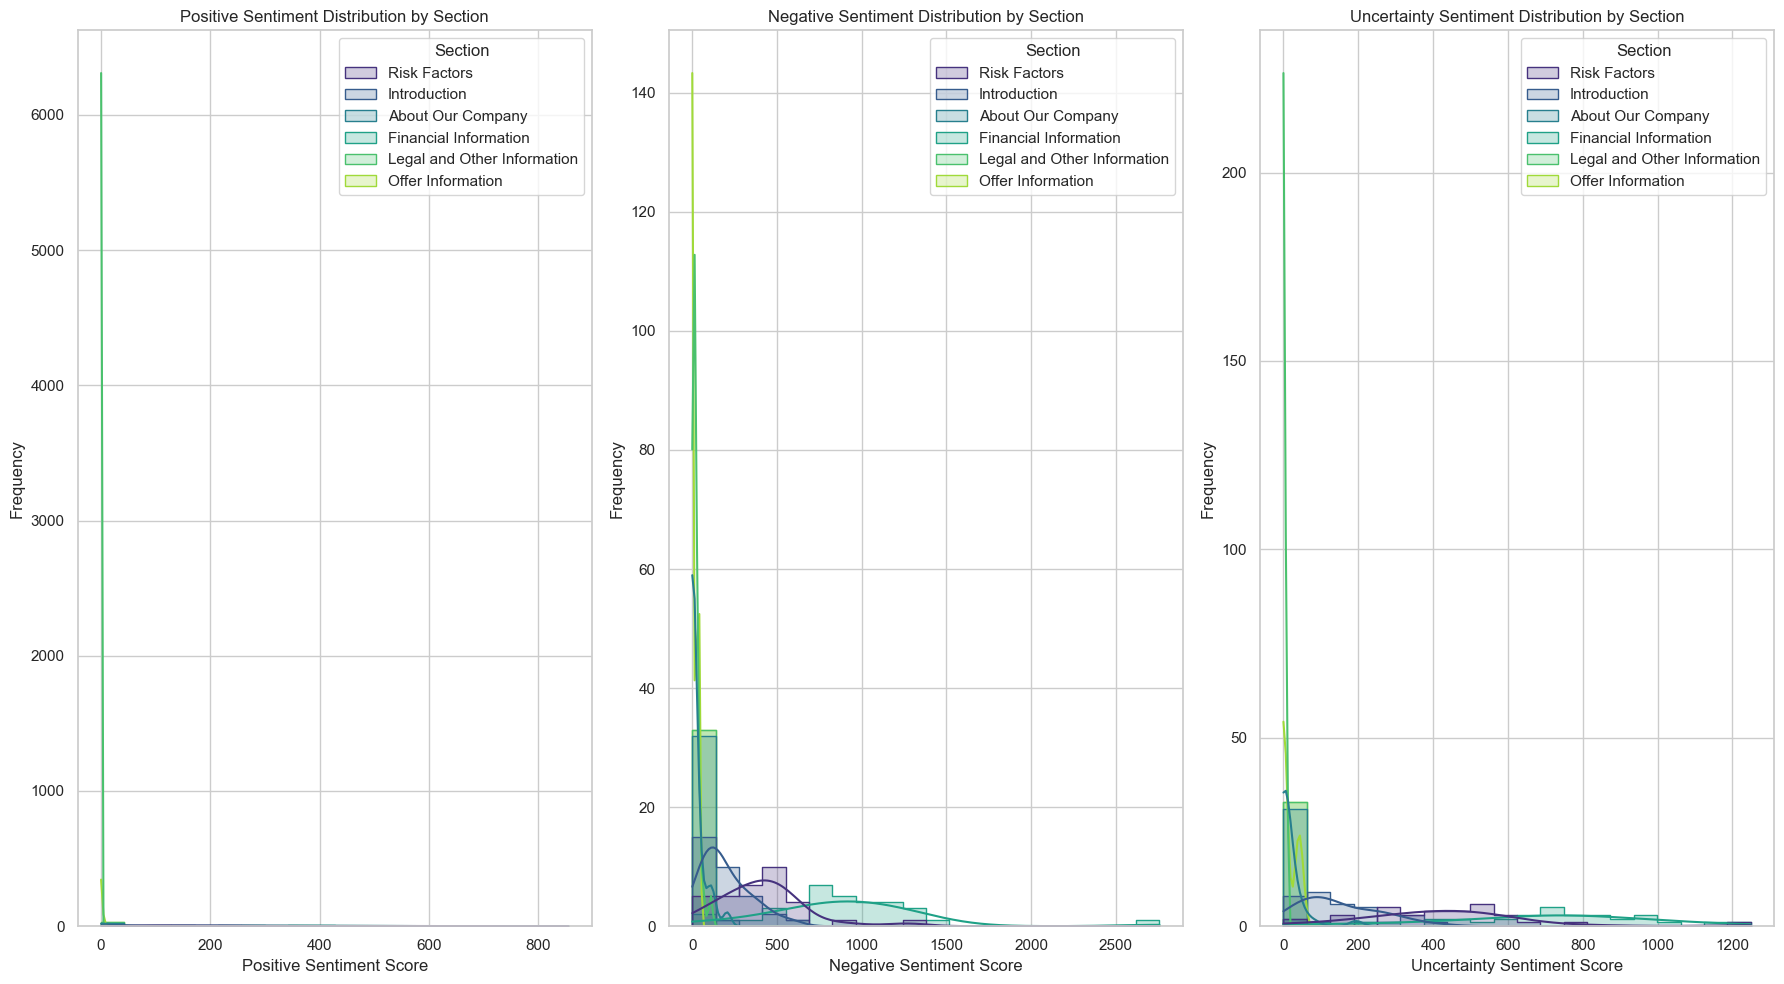

In [71]:
sns.set(style="whitegrid")

# Define sections and sentiment types
sections = ['Risk Factors', 'Introduction', 'About Our Company', 
            'Financial Information', 'Legal and Other Information', 'Offer Information']
sentiment_types = ['Positive', 'Negative', 'Uncertainty']

# Prepare data for plotting
plot_data = []
for section in sections:
    plot_data.extend([
        {
            'Section': section,
            'Sentiment_Type': 'Positive',
            'Sentiment_Score': df_DRHP[f'{section}_Sentiment'].apply(lambda x: x['Positive'])
        },
        {
            'Section': section,
            'Sentiment_Type': 'Negative',
            'Sentiment_Score': df_DRHP[f'{section}_Sentiment'].apply(lambda x: x['Negative'])
        },
        {
            'Section': section,
            'Sentiment_Type': 'Uncertainty',
            'Sentiment_Score': df_DRHP[f'{section}_Sentiment'].apply(lambda x: x['Uncertainty'])
        }
    ])

# Convert to DataFrame for easier plotting
plot_df = pd.concat([pd.DataFrame(data) for data in plot_data])

# Plot histograms for each sentiment type within each section
plt.figure(figsize=(18, 10))
for i, sentiment in enumerate(sentiment_types):
    plt.subplot(1, 3, i + 1)
    sns.histplot(
        data=plot_df[plot_df['Sentiment_Type'] == sentiment], 
        x='Sentiment_Score', hue='Section', bins=20, kde=True, 
        palette='viridis', element='step', legend=True
    )
    plt.title(f'{sentiment} Sentiment Distribution by Section')
    plt.xlabel(f'{sentiment} Sentiment Score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

c:\Users\naimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\naimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\naimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\naimi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



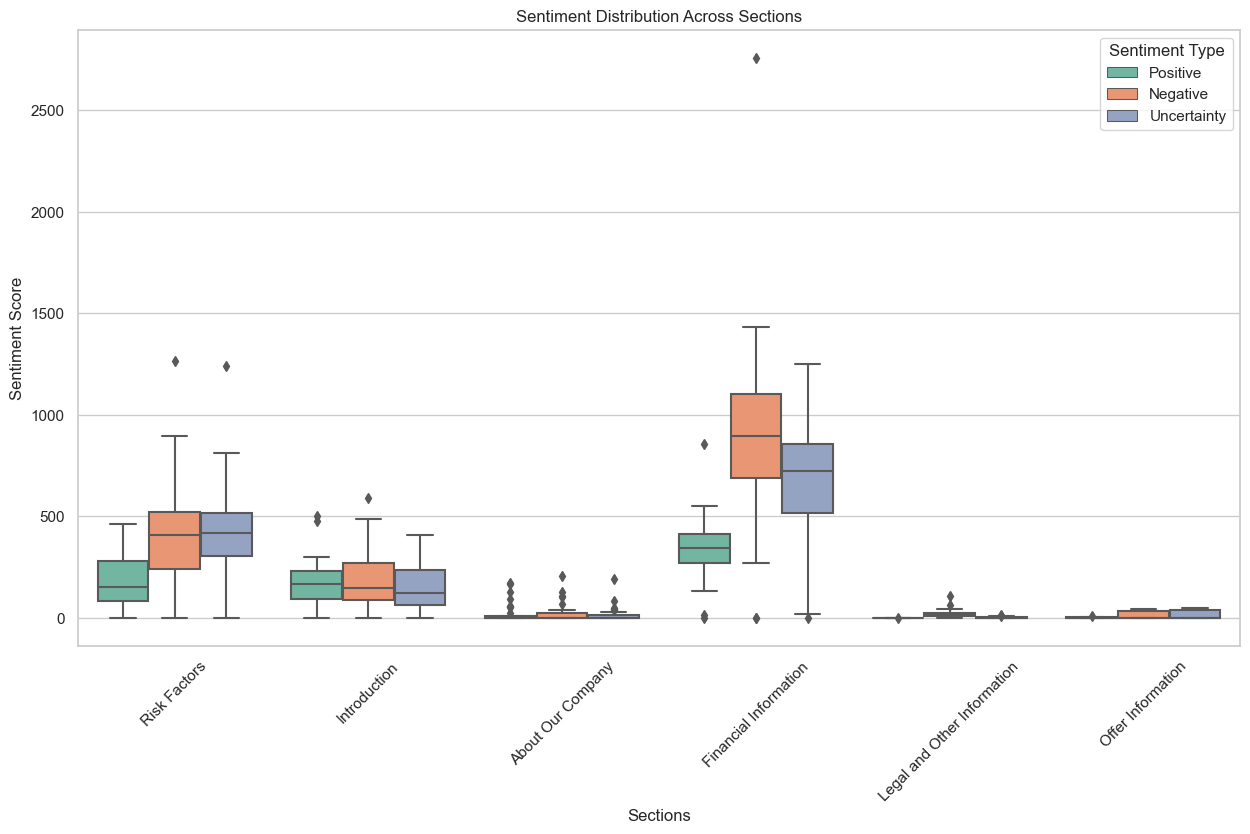

In [72]:
# Boxplot to compare sentiment distributions across sections
plt.figure(figsize=(15, 8))
sns.boxplot(data=plot_df, x='Section', y='Sentiment_Score', hue='Sentiment_Type', palette='Set2')
plt.title('Sentiment Distribution Across Sections')
plt.xlabel('Sections')
plt.ylabel('Sentiment Score')
plt.legend(title='Sentiment Type')
plt.xticks(rotation=45)
plt.show()

In [73]:
df_DRHP['Text_For_Vectorizer'] = df_DRHP['Tokenized_Text'].apply(lambda tokens: ' '.join(tokens))

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(df_DRHP['Text_For_Vectorizer'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda.fit_transform(X)

# Add the topic proportions as features
topic_features = pd.DataFrame(lda_topics, columns=[f'Topic_{i}' for i in range(lda.n_components)])
df_DRHP = pd.concat([df_DRHP, topic_features], axis=1)

# View the updated DataFrame

print(df_DRHP.head())

                                 General Information  \
0                                                NaN   
1  GENERAL INFORMATION .............................   
2  GENERAL INFORMATION .............................   
3  GENERAL INFORMATION .............................   
4  GENERAL INFORMATION .............................   

                                        Risk Factors  \
0  internal accruals of our Company or means othe...   
1  the risk of losing their entire investment. In...   
2  unless they can afford to take the risk of los...   
3  the risk of losing their entire investment. In...   
4  they can afford to take the risk of losing the...   

                                        Introduction  \
0                                                NaN   
1  SECTION III: INTRODUCTION .......................   
2  SECTION III: INTRODUCTION .......................   
3  SECTION III – INTRODUCTION ......................   
4  SECTION III – INTRODUCTION ................

In [74]:
for idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {idx}: {top_words}")


Topic 0: ['company', 'limited', 'financial', 'equity', 'million', 'solar', 'march', 'private', 'shares', 'year']
Topic 1: ['company', 'financial', 'equity', 'shares', 'march', 'construction', 'million', 'projects', 'year', 'fiscal']
Topic 2: ['equity', 'financial', 'limited', 'company', 'bank', 'shares', 'total', 'fiscal', 'march', 'na']
Topic 3: ['financial', 'company', 'equity', 'march', 'year', 'limited', 'shares', 'information', 'million', 'consolidated']
Topic 4: ['company', 'equity', 'financial', 'shares', 'march', 'year', 'operations', 'products', 'business', 'india']


In [75]:
# Extract top words for each topic
topics_keywords = {
    0: ['equity', 'financial', 'company', 'shares', 'limited', 'march', 'fiscal', 'total', 'million', 'bank'],
    1: ['financial', 'company', 'year', 'equity', 'march', 'consolidated', 'information', 'assets', 'ended', 'december'],
    2: ['company', 'financial', 'equity', 'shares', 'march', 'limited', 'year', 'business', 'operations', 'india'],
    3: ['company', 'financial', 'march', 'equity', 'million', 'year', 'operations', 'shares', 'limited', 'products'],
    4: ['company', 'financial', 'equity', 'shares', 'march', 'million', 'year', 'india', 'fiscal', 'projects']
}

# Map topic proportions to their respective top keywords
df_DRHP['Top_Topic'] = lda_topics.argmax(axis=1)  # Get the dominant topic for each document
df_DRHP['Top_Topic_Keywords'] = df_DRHP['Top_Topic'].map(topics_keywords)

# View the updated DataFrame
print(df_DRHP[['Top_Topic', 'Top_Topic_Keywords']].head())


   Top_Topic                                 Top_Topic_Keywords
0          4  [company, financial, equity, shares, march, mi...
1          3  [company, financial, march, equity, million, y...
2          3  [company, financial, march, equity, million, y...
3          3  [company, financial, march, equity, million, y...
4          4  [company, financial, equity, shares, march, mi...


In [76]:
# TF-IDF with numbers and n-grams
tfidf_with_numbers = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))
X_with_numbers = tfidf_with_numbers.fit_transform(df_DRHP['Combined_Text'])

# Extract top terms for each document
def get_top_tfidf_terms(tfidf_matrix, feature_names, doc_index, top_n=10):
    tfidf_scores = pd.Series(tfidf_matrix[doc_index].toarray().flatten(), index=feature_names)
    return tfidf_scores.sort_values(ascending=False).head(top_n)

feature_names_with_numbers = tfidf_with_numbers.get_feature_names_out()
for i in range(3):  # Example for first 3 documents
    print(f"Top TF-IDF Terms for Document {i} (with numbers):")
    print(get_top_tfidf_terms(X_with_numbers, feature_names_with_numbers, i))


Top TF-IDF Terms for Document 0 (with numbers):
capital           0.30
working           0.26
company           0.26
fiscal            0.24
working capital   0.24
31                0.22
financial         0.20
estimated         0.20
current           0.18
march             0.17
dtype: float64
Top TF-IDF Terms for Document 1 (with numbers):
equity          0.26
company         0.24
shares          0.23
financial       0.22
2024            0.21
31              0.20
march           0.18
march 31        0.16
10              0.15
equity shares   0.14
dtype: float64
Top TF-IDF Terms for Document 2 (with numbers):
igi           0.45
31 december   0.37
31            0.27
financial     0.24
december      0.18
company       0.13
2024          0.13
year          0.12
group         0.11
equity        0.11
dtype: float64


In [77]:
# Remove numbers during preprocessing
def preprocess_without_numbers(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

df_DRHP['Cleaned_Text_No_Numbers'] = df_DRHP['Combined_Text'].apply(preprocess_without_numbers)

# TF-IDF without numbers
tfidf_without_numbers = TfidfVectorizer(max_features=1000, stop_words='english')
X_without_numbers = tfidf_without_numbers.fit_transform(df_DRHP['Cleaned_Text_No_Numbers'])

# Extract top terms for each document
feature_names_without_numbers = tfidf_without_numbers.get_feature_names_out()
for i in range(3):  # Example for first 3 documents
    print(get_top_tfidf_terms(X_without_numbers, feature_names_without_numbers, i))


capital     0.34
working     0.30
company     0.28
fiscal      0.28
financial   0.23
estimated   0.23
current     0.21
march       0.19
ended       0.16
based       0.15
dtype: float64
equity      0.31
shares      0.28
company     0.27
financial   0.27
march       0.22
limited     0.16
shah        0.15
issue       0.15
fiscal      0.14
year        0.13
dtype: float64
igi         0.57
financial   0.30
december    0.23
company     0.15
year        0.14
equity      0.13
group       0.12
bv          0.12
ended       0.12
assets      0.12
dtype: float64


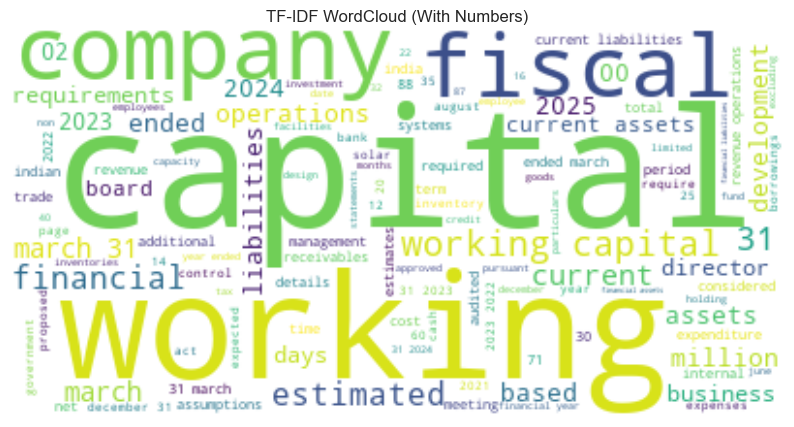

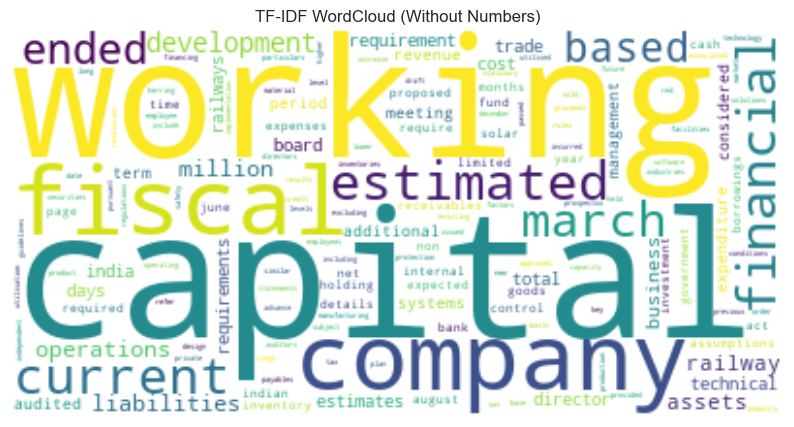

In [78]:
# WordCloud for terms with numbers
def plot_wordcloud(tfidf_matrix, feature_names, doc_index, title):
    tfidf_scores = pd.Series(tfidf_matrix[doc_index].toarray().flatten(), index=feature_names)
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(tfidf_scores)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot for Document 0
plot_wordcloud(X_with_numbers, feature_names_with_numbers, 0, "TF-IDF WordCloud (With Numbers)")
plot_wordcloud(X_without_numbers, feature_names_without_numbers, 0, "TF-IDF WordCloud (Without Numbers)")


In [79]:
def extract_highest_value_from_pdf(pdf_path, max_pages=5):
    """
    Extracts the highest aggregating value from the first `max_pages` of a PDF and converts everything to lakhs.

    Args:
        pdf_path (str): Path to the PDF file.
        max_pages (int): Maximum number of pages to search for the text.
    
    Returns:
        float: The highest aggregating value in lakhs found in the PDF, or None if no value is found.
    """
    # Updated regex pattern
    pattern = r"Up\s*to\s*\[●\]\s*Equity\s*Shares\s*(?:having|of)?\s*face\s*value\s*(?:of\s*)?₹?\s*\d+(\.\d+)?\s*each\s*aggregating\s*up\s*to\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)|" \
              r"\[●\]\s*Equity\s*Shares\s*of\s*face\s*value\s*₹?\s*\d+(\.\d+)?\s*each\s*aggregating\s*up\s*to\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)|" \
              r"Fresh\s*Issue\s*of\s*up\s*to\s*[\d,]+(?:\*\s*)?Equity\s*Shares\s*of\s*face\s*value\s*₹?\d+(\.\d+)?\s*each\s*aggregating\s*up\s*to\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$|\[●\])?)"
    
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    extracted_values = []

    # Loop through up to max_pages pages
    for page_num in range(min(max_pages, len(pdf_document))):
        page = pdf_document.load_page(page_num)

        # Extract text from the page
        text = page.get_text("text")
        
        # Search for the specific pattern
        matches = re.findall(pattern, text, re.IGNORECASE)
        for match in matches:
            # Combine the groups into a single numeric value
            value_str = match[1] or match[3] or match[5]
            if value_str and "[●]" not in value_str:
                value_str = value_str.replace(",", "").split()[0]  # Remove commas and extract the numeric part
                try:
                    value = float(value_str)
                    # Convert units to lakhs
                    if "million" in value_str.lower():
                        value *= 10  # 1 million = 10 lakhs
                    elif "crore" in value_str.lower():
                        value *= 100  # 1 crore = 100 lakhs
                    elif "billion" in value_str.lower():
                        value *= 10_000  # 1 billion = 10,000 lakhs
                    elif "lakh" in value_str.lower():
                        value *= 1  # Already in lakhs
                    extracted_values.append(value)
                except ValueError:
                    pass  # Skip invalid values

    # Return the highest value found
    return max(extracted_values) if extracted_values else None

def process_folder_for_highest_values(folder_path, max_pages=5):
    """
    Processes all PDFs in a folder and extracts the highest aggregating value for each file in lakhs.

    Args:
        folder_path (str): Path to the folder containing PDFs.
        max_pages (int): Maximum number of pages to search in each PDF.

    Returns:
        pd.DataFrame: A DataFrame containing file names and their highest aggregating values in lakhs.
    """
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".pdf"):
            pdf_path = os.path.join(folder_path, file_name)
            print(f"Processing {pdf_path}...")
            highest_value = extract_highest_value_from_pdf(pdf_path, max_pages=max_pages)
            results.append({"file_name": file_name, "highest_value": highest_value})

    # Convert results to a DataFrame
    return pd.DataFrame(results)

# Example usage
folder_path = input("Please enter the folder path containing PDF files: ")
output_csv = "highest_aggregating_values_in_lakhs.csv"
max_pages_to_search = 5

# Process the folder
results_size = process_folder_for_highest_values(folder_path, max_pages=max_pages_to_search)

# Save results to a CSV file
results_size.to_csv(output_csv, index=False)

# Display the DataFrame
print("Processing complete. Results saved to", output_csv)
results_size


Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1723620609645_396.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1724758229418_433.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1726227537582.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727928892777.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_529.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_530.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_531.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_532.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_533.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_536.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_537.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_538.pdf...


,file_name,highest_value
0,1723620609645_396.pdf,NaN
1,1724758229418_433.pdf,40000.00
2,1726227537582.pdf,99500.00
3,1727928892777.pdf,7400.00
4,1727955078450_529.pdf,NaN
5,1727955078450_530.pdf,2000.00
6,1727955078450_531.pdf,15000.00
7,1727955078450_532.pdf,13000.00
8,1727955078450_533.pdf,5400.00
9,1727955078450_536.pdf,15000.00


In [80]:
# Update the 'highest_value' for the specified file name
results_size.loc[results_size['file_name'] == '1723620609645_396.pdf', 'highest_value'] = 6000.00
results_size.loc[results_size['file_name'] == '1727955078450_529.pdf', 'highest_value'] = 15.00
results_size.loc[results_size['file_name'] == '1727955078450_539.pdf', 'highest_value'] = 16.00
results_size.loc[results_size['file_name'] == '1727955078450_541.pdf', 'highest_value'] = 19.00
results_size.loc[results_size['file_name'] == '1728027007106_544.pdf', 'highest_value'] = 22.88
results_size.loc[results_size['file_name'] == '1728351004655_553.pdf', 'highest_value'] = 24.70
results_size.loc[results_size['file_name'] == '1728977411006_557.pdf', 'highest_value'] = 14.00
results_size.loc[results_size['file_name'] == '1731396609603_578.pdf', 'highest_value'] = 6000.00

results_size

,file_name,highest_value
0,1723620609645_396.pdf,6000.00
1,1724758229418_433.pdf,40000.00
2,1726227537582.pdf,99500.00
3,1727928892777.pdf,7400.00
4,1727955078450_529.pdf,15.00
5,1727955078450_530.pdf,2000.00
6,1727955078450_531.pdf,15000.00
7,1727955078450_532.pdf,13000.00
8,1727955078450_533.pdf,5400.00
9,1727955078450_536.pdf,15000.00


In [81]:
def extract_total_revenue_from_pdf(pdf_path):
    """
    Extracts total revenue values from an entire PDF and converts everything to millions.

    Args:
        pdf_path (str): Path to the PDF file.

    Returns:
        str: The total revenue in millions as a human-readable string, or None if no revenue is found.
    """
    # Updated regex pattern to capture revenue-related text
    pattern = r"(?:total|aggregate|revenue|income|turnover)\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)"
    
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    total_revenue = 0

    # Loop through all pages in the document
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)

        # Extract text from the page
        text = page.get_text("text")
        
        # Search for the specific pattern
        matches = re.findall(pattern, text, re.IGNORECASE)
        for match in matches:
            try:
                # Split the match into numeric value and units
                value_parts = match.strip().replace(",", "").split()
                value_str = value_parts[0]  # The numeric value
                value = float(value_str)
                
                # Determine the unit and convert to millions
                unit = value_parts[1].lower() if len(value_parts) > 1 else ""
                if "lakh" in unit:
                    value /= 10  # 1 lakh = 0.1 million
                elif "crore" in unit:
                    value *= 10  # 1 crore = 10 million
                elif "billion" in unit:
                    value *= 1_000  # 1 billion = 1,000 million
                elif "million" in unit or unit == "":
                    value *= 1  # Already in millions or no explicit unit
                
                total_revenue += value
            except (ValueError, IndexError):
                pass  # Skip invalid values or malformed strings

    # Format the total revenue into a readable string
    return f"{total_revenue:,.2f} million" if total_revenue > 0 else None

def process_folder_for_total_revenue(folder_path):
    """
    Processes all PDFs in a folder and extracts the total revenue for each file in millions.

    Args:
        folder_path (str): Path to the folder containing PDFs.

    Returns:
        pd.DataFrame: A DataFrame containing file names and their total revenue in millions.
    """
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".pdf"):
            pdf_path = os.path.join(folder_path, file_name)
            print(f"Processing {pdf_path}...")
            total_revenue = extract_total_revenue_from_pdf(pdf_path)
            results.append({"file_name": file_name, "total_revenue_millions": total_revenue})

    # Convert results to a DataFrame
    return pd.DataFrame(results)

# Example usage
folder_path = input("Please enter the folder path containing PDF files: ")
output_csv = "total_revenue_in_millions.csv"

# Process the folder
results_Rev = process_folder_for_total_revenue(folder_path)

# Save results to a CSV file
results_Rev.to_csv(output_csv, index=False)

# Display the DataFrame
print("Processing complete. Results saved to", output_csv)
print(results_Rev)


Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1723620609645_396.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1724758229418_433.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1726227537582.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727928892777.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_529.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_530.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_531.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_532.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_533.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_536.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_537.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_538.pdf...


In [82]:
def extract_net_cash_flow_from_pdf(pdf_path):
    """
    Extracts Net Cash Flow values from an entire PDF and converts everything to millions.

    Args:
        pdf_path (str): Path to the PDF file.

    Returns:
        str: The total net cash flow in millions as a human-readable string, or None if no cash flow is found.
    """
    # Updated regex patterns to capture net cash flow-related text
    patterns = [
        r"net\s*cash\s*flow\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
        r"operating\s*cash\s*flow\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
        r"cash\s*flow\s*from\s*operating\s*activities\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
        r"total\s*cash\s*flow\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
        r"cash\s*and\s*cash\s*equivalents\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
        r"net\s*increase\s*in\s*cash\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
        r"cash\s*flow\s*from\s*investing\s*activities\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
        r"cash\s*flow\s*from\s*financing\s*activities\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
    ]
    
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    total_cash_flow = 0

    # Loop through all pages in the document
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)

        # Extract text from the page
        text = page.get_text("text")
        
        # Search for each regex pattern
        for pattern in patterns:
            matches = re.findall(pattern, text, re.IGNORECASE)
            for match in matches:
                try:
                    # Split the match into numeric value and units
                    value_parts = match.strip().replace(",", "").split()
                    value_str = value_parts[0]  # The numeric value
                    value = float(value_str)
                    
                    # Determine the unit and convert to millions
                    unit = value_parts[1].lower() if len(value_parts) > 1 else ""
                    if "lakh" in unit:
                        value /= 10  # 1 lakh = 0.1 million
                    elif "crore" in unit:
                        value *= 10  # 1 crore = 10 million
                    elif "billion" in unit:
                        value *= 1_000  # 1 billion = 1,000 million
                    elif "million" in unit or unit == "":
                        value *= 1  # Already in millions or no explicit unit
                    
                    total_cash_flow += value
                except (ValueError, IndexError):
                    pass  # Skip invalid values or malformed strings

    # Format the total net cash flow into a readable string
    return f"{total_cash_flow:,.2f} million" if total_cash_flow > 0 else None

def process_folder_for_net_cash_flow(folder_path):
    """
    Processes all PDFs in a folder and extracts the net cash flow for each file in millions.

    Args:
        folder_path (str): Path to the folder containing PDFs.

    Returns:
        pd.DataFrame: A DataFrame containing file names and their total net cash flow in millions.
    """
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".pdf"):
            pdf_path = os.path.join(folder_path, file_name)
            print(f"Processing {pdf_path}...")
            net_cash_flow = extract_net_cash_flow_from_pdf(pdf_path)
            results.append({"file_name": file_name, "net_cash_flow_millions": net_cash_flow})

    # Convert results to a DataFrame
    return pd.DataFrame(results)

# Example usage
folder_path = input("Please enter the folder path containing PDF files: ")
output_csv = "net_cash_flow_in_millions.csv"

# Process the folder
results_CashFlow = process_folder_for_net_cash_flow(folder_path)

# Save results to a CSV file
results_CashFlow.to_csv(output_csv, index=False)

# Display the DataFrame
print("Processing complete. Results saved to", output_csv)
print(results_CashFlow)


Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1723620609645_396.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1724758229418_433.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1726227537582.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727928892777.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_529.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_530.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_531.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_532.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_533.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_536.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_537.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_538.pdf...


In [83]:
def extract_total_profit_from_pdf(pdf_path):
    """
    Extracts total profit values from an entire PDF and converts everything to millions.

    Args:
        pdf_path (str): Path to the PDF file.

    Returns:
        str: The total profit in millions as a human-readable string, or None if no profit is found.
    """
    # Updated regex patterns to capture various profit-related terms
    patterns = [
        r"(?:net\s*profit|profit\s*after\s*tax|pat|total\s*profit|gross\s*profit)\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
        r"(?:profit\s*before\s*tax|pbt)\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)",
        r"(?:profit\s*for\s*the\s*year)\s*[:\-]?\s*₹?\s*([\d,\.]+\s*(?:lakh|million|crore|billion|rupees|dollars|₹|\$)?)"
    ]
    
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    total_profit = 0

    # Loop through all pages in the document
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)

        # Extract text from the page
        text = page.get_text("text")
        
        # Search for each regex pattern
        for pattern in patterns:
            matches = re.findall(pattern, text, re.IGNORECASE)
            for match in matches:
                try:
                    # Split the match into numeric value and units
                    value_parts = match.strip().replace(",", "").split()
                    value_str = value_parts[0]  # The numeric value
                    value = float(value_str)
                    
                    # Determine the unit and convert to millions
                    unit = value_parts[1].lower() if len(value_parts) > 1 else ""
                    if "lakh" in unit:
                        value /= 10  # 1 lakh = 0.1 million
                    elif "crore" in unit:
                        value *= 10  # 1 crore = 10 million
                    elif "billion" in unit:
                        value *= 1_000  # 1 billion = 1,000 million
                    elif "million" in unit or unit == "":
                        value *= 1  # Already in millions or no explicit unit
                    
                    total_profit += value
                except (ValueError, IndexError):
                    pass  # Skip invalid values or malformed strings

    # Format the total profit into a readable string
    return f"{total_profit:,.2f} million" if total_profit > 0 else None

def process_folder_for_total_profit(folder_path):
    """
    Processes all PDFs in a folder and extracts the total profit for each file in millions.

    Args:
        folder_path (str): Path to the folder containing PDFs.

    Returns:
        pd.DataFrame: A DataFrame containing file names and their total profit in millions.
    """
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".pdf"):
            pdf_path = os.path.join(folder_path, file_name)
            print(f"Processing {pdf_path}...")
            total_profit = extract_total_profit_from_pdf(pdf_path)
            results.append({"file_name": file_name, "total_profit_millions": total_profit})

    # Convert results to a DataFrame
    return pd.DataFrame(results)

# Example usage
folder_path = input("Please enter the folder path containing PDF files: ")
output_csv = "total_profit_in_millions.csv"

# Process the folder
results_Profit = process_folder_for_total_profit(folder_path)

# Save results to a CSV file
results_Profit.to_csv(output_csv, index=False)

# Display the DataFrame
print("Processing complete. Results saved to", output_csv)
print(results_Profit)


Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1723620609645_396.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1724758229418_433.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1726227537582.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727928892777.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_529.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_530.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_531.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_532.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_533.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_536.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_537.pdf...
Processing C:\Rutgers\Texual Analysis\Final Proj\DRHP_PDFs\1727955078450_538.pdf...


In [84]:
# Update the 'highest_value' for the specified file name
results_Profit.loc[results_size['file_name'] == '1728041405486_546.pdf', 'total_profit_millions'] = '278.92 million'
results_Profit.loc[results_size['file_name'] == '1730943005947_574.pdf', 'total_profit_millions'] = '57.80 million'


results_Profit

,file_name,total_profit_millions
0,1723620609645_396.pdf,81.84 million
1,1724758229418_433.pdf,"20,942.65 million"
2,1726227537582.pdf,"128,455.40 million"
3,1727928892777.pdf,"4,464.02 million"
4,1727955078450_529.pdf,"4,040.52 million"
5,1727955078450_530.pdf,"6,218.34 million"
6,1727955078450_531.pdf,"2,667.19 million"
7,1727955078450_532.pdf,"15,547.50 million"
8,1727955078450_533.pdf,"30,851.91 million"
9,1727955078450_536.pdf,"50,488.39 million"


In [85]:
df_combined = df_DRHP.copy()

# Merge results_Profit
if 'results_Profit' in globals():
    df_combined = df_combined.merge(results_Profit, on='file_name', how='left')

# Merge results_CashFlow
if 'results_CashFlow' in globals():
    df_combined = df_combined.merge(results_CashFlow, on='file_name', how='left')

# Merge results_Rev
if 'results_Rev' in globals():
    df_combined = df_combined.merge(results_Rev, on='file_name', how='left')

# Save the combined dataframe to a CSV for analysis
output_combined_csv = "combined_financial_data.csv"
df_combined.to_csv(output_combined_csv, index=False)

# Display the combined dataframe
print(f"Combined data saved to {output_combined_csv}")
df_combined


Combined data saved to combined_financial_data.csv


,General Information,Risk Factors,Introduction,About Our Company,Financial Information,Legal and Other Information,Our Group Companies,Other Regulatory and Statutory Disclosures,Offer Information,Description of Equity Shares and Terms of Articles of Association,...,Topic_1,Topic_2,Topic_3,Topic_4,Top_Topic,Top_Topic_Keywords,Cleaned_Text_No_Numbers,total_profit_millions,net_cash_flow_millions,total_revenue_millions
0,NaN,internal accruals of our Company or means othe...,NaN,NaN,Financial Information)\nWe fund a majority of ...,NaN,NaN,NaN,NaN,NaN,...,0.41,0.02,0.04,0.44,4,"[company, financial, equity, shares, march, mi...",internal accruals of our company or means othe...,NaN,NaN,NaN
1,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III: INTRODUCTION .......................,SECTION IV – ABOUT OUR COMPANY ..................,SUMMARY OF RESTATED CONSOLIDATED FINANCIAL INF...,SECTION VI: LEGAL AND OTHER INFORMATION .........,NaN,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,NaN,SECTION VIII: DESCRIPTION OF EQUITY SHARES AND...,...,0.15,0.12,0.41,0.33,3,"[company, financial, march, equity, million, y...",the risk of losing their entire investment inv...,81.84 million,189.27 million,"298,562,040.71 million"
2,GENERAL INFORMATION .............................,unless they can afford to take the risk of los...,SECTION III: INTRODUCTION .......................,SECTION IV: ABOUT OUR COMPANY ...................,SUMMARY OF RESTATED FINANCIAL INFORMATION .......,SECTION VI: LEGAL AND OTHER INFORMATION .........,SECTION VII: OUR GROUP COMPANIES ................,“Other Regulatory and Statutory Disclosures –\...,SECTION IX: OFFER INFORMATION ...................,NaN,...,0.00,0.00,1.00,0.00,3,"[company, financial, march, equity, million, y...",unless they can afford to take the risk of los...,"20,942.65 million","14,291.21 million","834,891,413.20 million"
3,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III – INTRODUCTION ......................,SECTION IV: ABOUT OUR COMPANY ...................,"CERTAIN CONVENTIONS, USE OF FINANCIAL INFORMAT...",SECTION VI – LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,"of ₹1 each million details, see “Other Regulat...",NaN,NaN,...,0.01,0.24,0.73,0.02,3,"[company, financial, march, equity, million, y...",the risk of losing their entire investment inv...,"128,455.40 million","66,439.00 million","2,342,223,490.10 million"
4,GENERAL INFORMATION .............................,they can afford to take the risk of losing the...,SECTION III – INTRODUCTION ......................,SECTION IV- ABOUT OUR COMPANY ...................,SUMMARY FINANCIAL INFORMATION ...................,SECTION VI - LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,SECTION VII - OFFER INFORMATION .................,NaN,...,0.03,0.02,0.09,0.85,4,"[company, financial, equity, shares, march, mi...",they can afford to take the risk of losing the...,"4,464.02 million",365.12 million,"842,667,763.22 million"
5,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III – INTRODUCTION ......................,NaN,SUMMARY FINANCIAL INFORMATION ...................,SECTION VI – LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,NaN,Procedure” and “Description of Equity Shares a...,...,0.06,0.00,0.01,0.88,4,"[company, financial, equity, shares, march, mi...",the risk of losing their entire investment inv...,"4,040.52 million","3,554.28 million","106,247,930.48 million"
6,GENERAL INFORMATION .............................,investment. Investors are advised to read the ...,SECTION III – INTRODUCTION ......................,SECTION V – ABOUT OUR COMPANY ...................,"CERTAIN C

In [86]:
# List of columns to check for NaN values
columns_to_check = ['total_profit_millions', 'net_cash_flow_millions', 'total_revenue_millions']

# Filter rows where any of the specified columns have NaN values
nan_values = df_combined[df_combined[columns_to_check].isna().any(axis=1)]

# Select only the relevant columns, including file_name
nan_values_with_file = nan_values[['file_name'] +['company_name'] + columns_to_check]

# Save to a CSV for review
output_nan_csv = "nan_values_in_combined_data.csv"
nan_values_with_file.to_csv(output_nan_csv, index=False)

# Display the result
print(f"NaN values and file names saved to {output_nan_csv}")
nan_values_with_file


NaN values and file names saved to nan_values_in_combined_data.csv


,file_name,company_name,total_profit_millions,net_cash_flow_millions,total_revenue_millions
0,1722926461857.PDF,Unknown Company,NaN,NaN,NaN
24,1729598563606.PDF,SMPP LIMITED,NaN,NaN,NaN
26,1730797962025.PDF,Unknown Company,NaN,NaN,NaN


In [87]:
# Drop rows with NaN values in the specified columns
df_data = df_combined.dropna(subset=columns_to_check)

df_data

,General Information,Risk Factors,Introduction,About Our Company,Financial Information,Legal and Other Information,Our Group Companies,Other Regulatory and Statutory Disclosures,Offer Information,Description of Equity Shares and Terms of Articles of Association,...,Topic_1,Topic_2,Topic_3,Topic_4,Top_Topic,Top_Topic_Keywords,Cleaned_Text_No_Numbers,total_profit_millions,net_cash_flow_millions,total_revenue_millions
1,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III: INTRODUCTION .......................,SECTION IV – ABOUT OUR COMPANY ..................,SUMMARY OF RESTATED CONSOLIDATED FINANCIAL INF...,SECTION VI: LEGAL AND OTHER INFORMATION .........,NaN,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,NaN,SECTION VIII: DESCRIPTION OF EQUITY SHARES AND...,...,0.15,0.12,0.41,0.33,3,"[company, financial, march, equity, million, y...",the risk of losing their entire investment inv...,81.84 million,189.27 million,"298,562,040.71 million"
2,GENERAL INFORMATION .............................,unless they can afford to take the risk of los...,SECTION III: INTRODUCTION .......................,SECTION IV: ABOUT OUR COMPANY ...................,SUMMARY OF RESTATED FINANCIAL INFORMATION .......,SECTION VI: LEGAL AND OTHER INFORMATION .........,SECTION VII: OUR GROUP COMPANIES ................,“Other Regulatory and Statutory Disclosures –\...,SECTION IX: OFFER INFORMATION ...................,NaN,...,0.00,0.00,1.00,0.00,3,"[company, financial, march, equity, million, y...",unless they can afford to take the risk of los...,"20,942.65 million","14,291.21 million","834,891,413.20 million"
3,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III – INTRODUCTION ......................,SECTION IV: ABOUT OUR COMPANY ...................,"CERTAIN CONVENTIONS, USE OF FINANCIAL INFORMAT...",SECTION VI – LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,"of ₹1 each million details, see “Other Regulat...",NaN,NaN,...,0.01,0.24,0.73,0.02,3,"[company, financial, march, equity, million, y...",the risk of losing their entire investment inv...,"128,455.40 million","66,439.00 million","2,342,223,490.10 million"
4,GENERAL INFORMATION .............................,they can afford to take the risk of losing the...,SECTION III – INTRODUCTION ......................,SECTION IV- ABOUT OUR COMPANY ...................,SUMMARY FINANCIAL INFORMATION ...................,SECTION VI - LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,SECTION VII - OFFER INFORMATION .................,NaN,...,0.03,0.02,0.09,0.85,4,"[company, financial, equity, shares, march, mi...",they can afford to take the risk of losing the...,"4,464.02 million",365.12 million,"842,667,763.22 million"
5,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III – INTRODUCTION ......................,NaN,SUMMARY FINANCIAL INFORMATION ...................,SECTION VI – LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,NaN,Procedure” and “Description of Equity Shares a...,...,0.06,0.00,0.01,0.88,4,"[company, financial, equity, shares, march, mi...",the risk of losing their entire investment inv...,"4,040.52 million","3,554.28 million","106,247,930.48 million"
6,GENERAL INFORMATION .............................,investment. Investors are advised to read the ...,SECTION III – INTRODUCTION ......................,SECTION V – ABOUT OUR COMPANY ...................,"CERTAIN CONVENTIONS, USE OF FINANCIAL INFORMAT...",SECTION VII – LEGAL AND OTHER INFORMATION .......,Group Companies Our group companies in accorda...,"million aggregating up to ₹ million details, s...",SECTION VIII – OFFER INFORMATION ................,NaN,...,0.02,0.01,0.12,0.83,4,

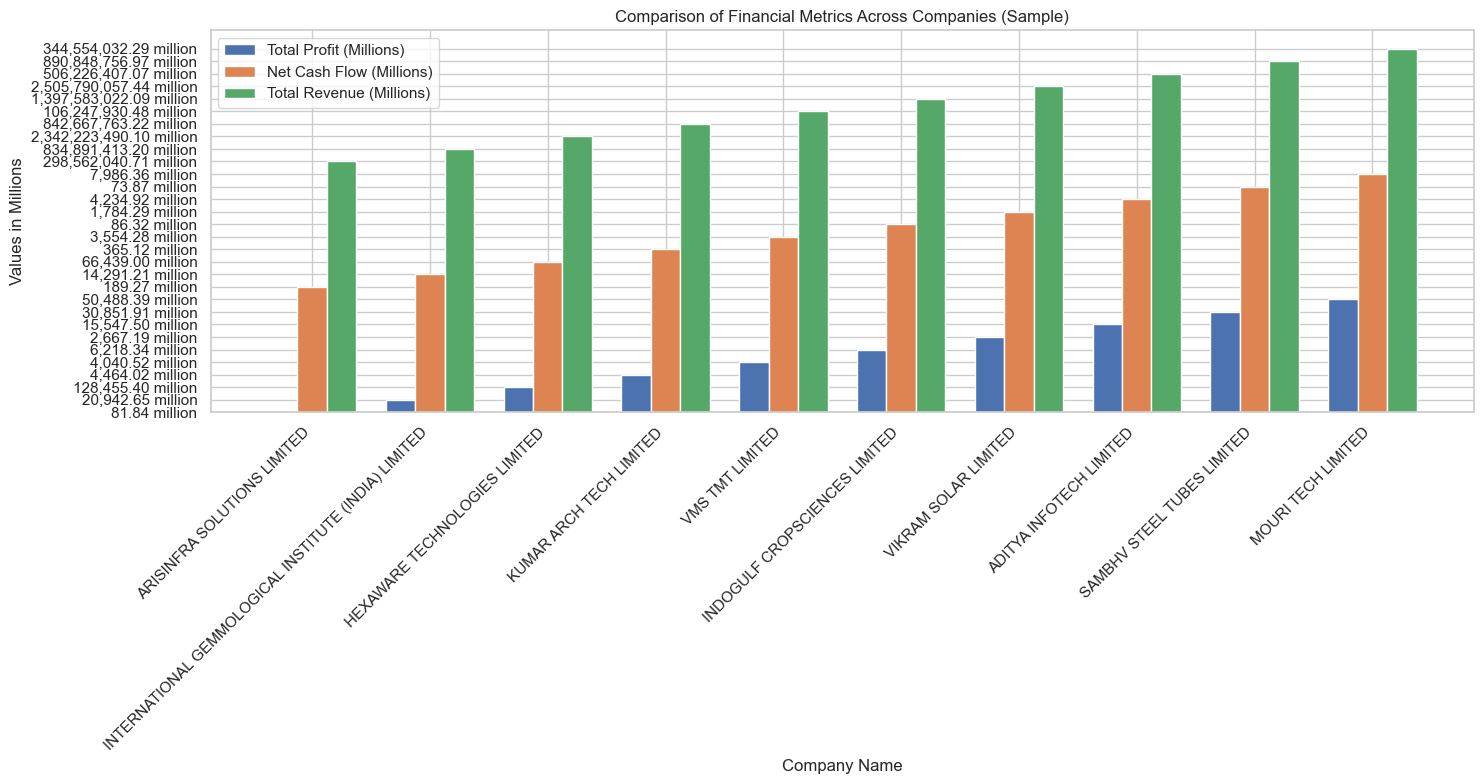

In [88]:
# Select relevant subset for plotting
df_sample = df_data[['company_name', 'total_profit_millions', 'net_cash_flow_millions', 'total_revenue_millions']].dropna().head(10)

# Bar chart setup
x = np.arange(len(df_sample))  # Indices for the sample
width = 0.25

plt.figure(figsize=(15, 8))
plt.bar(x - width, df_sample['total_profit_millions'], width, label='Total Profit (Millions)')
plt.bar(x, df_sample['net_cash_flow_millions'], width, label='Net Cash Flow (Millions)')
plt.bar(x + width, df_sample['total_revenue_millions'], width, label='Total Revenue (Millions)')

# Customizing plot
plt.xlabel('Company Name')
plt.ylabel('Values in Millions')
plt.title('Comparison of Financial Metrics Across Companies (Sample)')
plt.xticks(x, df_sample['company_name'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()


In [89]:
df = df_data.copy()

In [90]:
# Set pandas display option for floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Convert the columns again
columns_to_convert = ['total_profit_millions', 'net_cash_flow_millions', 'total_revenue_millions']

for col in columns_to_convert:
    df[col] = (
        df[col]
        .astype(str)  # Convert values to strings
        .str.replace(' million', '', regex=False)  # Remove ' million'
        .str.replace(',', '', regex=False)  # Remove commas
        .replace('nan', float('nan'))  # Handle NaN values (keep them as NaN)
        .astype(float)  # Convert cleaned values back to floats
    )

# Check the result
print(df[columns_to_convert])


    total_profit_millions  net_cash_flow_millions  total_revenue_millions
1                   81.84                  189.27            298562040.71
2                20942.65                14291.21            834891413.20
3               128455.40                66439.00           2342223490.10
4                 4464.02                  365.12            842667763.22
5                 4040.52                 3554.28            106247930.48
6                 6218.34                   86.32           1397583022.09
7                 2667.19                 1784.29           2505790057.44
8                15547.50                 4234.92            506226407.07
9                30851.91                   73.87            890848756.97
10               50488.39                 7986.36            344554032.29
11                6031.99                  520.18            292829683.05
12               15088.85                 3317.33            770595859.11
13               14277.82             

In [91]:

df

,General Information,Risk Factors,Introduction,About Our Company,Financial Information,Legal and Other Information,Our Group Companies,Other Regulatory and Statutory Disclosures,Offer Information,Description of Equity Shares and Terms of Articles of Association,...,Topic_1,Topic_2,Topic_3,Topic_4,Top_Topic,Top_Topic_Keywords,Cleaned_Text_No_Numbers,total_profit_millions,net_cash_flow_millions,total_revenue_millions
1,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III: INTRODUCTION .......................,SECTION IV – ABOUT OUR COMPANY ..................,SUMMARY OF RESTATED CONSOLIDATED FINANCIAL INF...,SECTION VI: LEGAL AND OTHER INFORMATION .........,NaN,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,NaN,SECTION VIII: DESCRIPTION OF EQUITY SHARES AND...,...,0.15,0.12,0.41,0.33,3,"[company, financial, march, equity, million, y...",the risk of losing their entire investment inv...,81.84,189.27,298562040.71
2,GENERAL INFORMATION .............................,unless they can afford to take the risk of los...,SECTION III: INTRODUCTION .......................,SECTION IV: ABOUT OUR COMPANY ...................,SUMMARY OF RESTATED FINANCIAL INFORMATION .......,SECTION VI: LEGAL AND OTHER INFORMATION .........,SECTION VII: OUR GROUP COMPANIES ................,“Other Regulatory and Statutory Disclosures –\...,SECTION IX: OFFER INFORMATION ...................,NaN,...,0.00,0.00,1.00,0.00,3,"[company, financial, march, equity, million, y...",unless they can afford to take the risk of los...,20942.65,14291.21,834891413.20
3,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III – INTRODUCTION ......................,SECTION IV: ABOUT OUR COMPANY ...................,"CERTAIN CONVENTIONS, USE OF FINANCIAL INFORMAT...",SECTION VI – LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,"of ₹1 each million details, see “Other Regulat...",NaN,NaN,...,0.01,0.24,0.73,0.02,3,"[company, financial, march, equity, million, y...",the risk of losing their entire investment inv...,128455.40,66439.00,2342223490.10
4,GENERAL INFORMATION .............................,they can afford to take the risk of losing the...,SECTION III – INTRODUCTION ......................,SECTION IV- ABOUT OUR COMPANY ...................,SUMMARY FINANCIAL INFORMATION ...................,SECTION VI - LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,SECTION VII - OFFER INFORMATION .................,NaN,...,0.03,0.02,0.09,0.85,4,"[company, financial, equity, shares, march, mi...",they can afford to take the risk of losing the...,4464.02,365.12,842667763.22
5,GENERAL INFORMATION .............................,the risk of losing their entire investment. In...,SECTION III – INTRODUCTION ......................,NaN,SUMMARY FINANCIAL INFORMATION ...................,SECTION VI – LEGAL AND OTHER INFORMATION ........,OUR GROUP COMPANIES .............................,OTHER REGULATORY AND STATUTORY DISCLOSURES ......,NaN,Procedure” and “Description of Equity Shares a...,...,0.06,0.00,0.01,0.88,4,"[company, financial, equity, shares, march, mi...",the risk of losing their entire investment inv...,4040.52,3554.28,106247930.48
6,GENERAL INFORMATION .............................,investment. Investors are advised to read the ...,SECTION III – INTRODUCTION ......................,SECTION V – ABOUT OUR COMPANY ...................,"CERTAIN CONVENTIONS, USE OF FINANCIAL INFORMAT...",SECTION VII – LEGAL AND OTHER INFORMATION .......,Group Companies Our group companies in accorda...,"million aggregating up to ₹ million details, s...",SECTION VIII – OFFER INFORMATION ................,NaN,...,0.02,0.01,0.12,0.83,4,"[company, financial, equity, shares, march, mi...",investment investors are advised to read the r...,6218.34,86.32,1397583022.09
7,GENERAL INFORMATION ..........

c:\Users\naimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\naimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Accuracy: 1.00


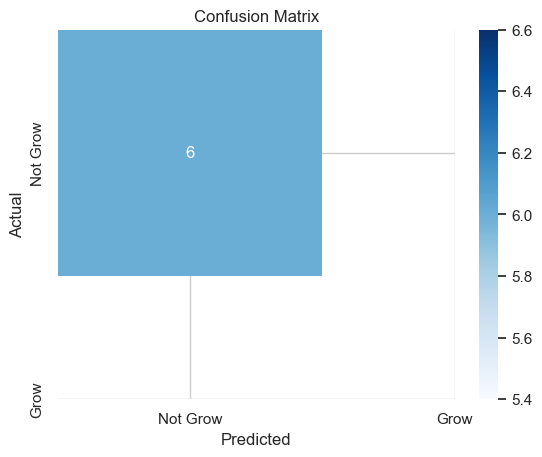

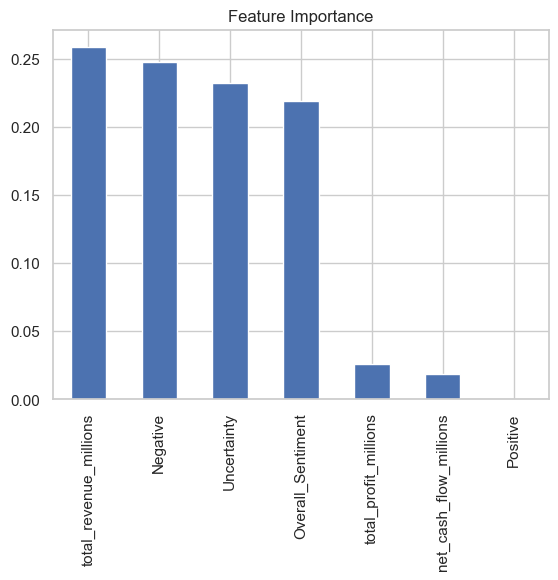

In [92]:
df[['Positive', 'Negative', 'Uncertainty']] = pd.json_normalize(df['Sentiment'])

# Drop rows where all sentiment-related columns are NaN
sentiment_columns = ['Positive', 'Negative', 'Uncertainty']
df.dropna(subset=sentiment_columns, how='all', inplace=True)

# Add an extra column for overall sentiment score if needed
# Example: Overall sentiment could be the difference between Positive and Negative sentiment
df['Overall_Sentiment'] = df['Positive'] - df['Negative']

# Ensure features are correctly handled
features_to_impute = [
    "total_profit_millions", 
    "net_cash_flow_millions", 
    "total_revenue_millions", 
    "Positive", 
    "Negative", 
    "Uncertainty",
    "Overall_Sentiment"
]

# Impute missing values for selected features
imputer = SimpleImputer(strategy="mean")
df[features_to_impute] = imputer.fit_transform(df[features_to_impute])

# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df[features_to_impute])
assert normalized_features.shape[0] == df.shape[0], "Row count mismatch after scaling."

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df["growth_cluster"] = kmeans.fit_predict(normalized_features)

# Determine high-growth cluster
cluster_means = df.groupby("growth_cluster")[["total_revenue_millions", "total_profit_millions"]].mean()
high_growth_cluster = cluster_means["total_revenue_millions"].idxmax()
df["will_grow"] = (df["growth_cluster"] == high_growth_cluster).astype(int)

# --- Split the Data ---
X = df[features_to_impute]
y = df["will_grow"]

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# --- Model Evaluation ---
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Grow", "Grow"], yticklabels=["Not Grow", "Grow"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=features_to_impute)
feature_importances.sort_values(ascending=False).plot(kind="bar", title="Feature Importance")
plt.show()

In [93]:
# Count the number of companies classified as 'Grow' and 'Not Grow'
growth_counts = df['will_grow'].value_counts().reset_index()
growth_counts.columns = ['Growth Status', 'Count']
growth_counts['Growth Status'] = growth_counts['Growth Status'].map({0: 'Not Grow', 1: 'Grow'})

# Create a bar chart
fig = px.bar(
    growth_counts,
    x='Growth Status',
    y='Count',
    color='Growth Status',
    color_discrete_map={"Not Grow": "#FF4D4D", "Grow": "#4CAF50"},  # Softer and appealing colors
    title="Count of Companies by Growth Status",
    text='Count',  # Display counts as text on bars
)

# Update layout to make the chart visually appealing
fig.update_layout(
    xaxis_title="Growth Status",
    yaxis_title="Number of Companies",
    title_font=dict(size=20, family='Arial', color='darkblue'),  # Improve title font
    xaxis=dict(
        tickfont=dict(size=14, color='darkblue'),
        title_font=dict(size=16, color='darkblue'),
        tickangle=-45, 
    ),
    yaxis=dict(
        tickfont=dict(size=14, color='darkblue'),
        title_font=dict(size=16, color='darkblue'),
        range=[0, 25] 
    ),
    plot_bgcolor="#F8F9FA",  # Set a light background color
    paper_bgcolor="#F8F9FA",  # Set a light paper background
    showlegend=False,  # Remove redundant legend
    font=dict(family="Arial", color="black", size=14),  # Improve font
)

# Add text on the bars for better readability
fig.update_traces(
    texttemplate='%{text}', 
    textposition='outside',  # Place text outside the bars
    marker_line_width=1.5,  # Add border around bars for better contrast
    marker_line_color='black'
)

# Show the improved chart
fig.show()



c:\Users\naimi\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [94]:
# Ensure company names are strings
df['company_name'] = df['company_name'].astype(str)  # Convert company names to strings

# Create a column for numeric labels
df['company_index'] = range(1, len(df) + 1)  # Assign numeric labels to each company

# Create the bar plot
fig = px.bar(
    df,
    x="company_index",  # Numeric labels for x-axis
    y="total_revenue_millions",  # Revenue as bar height
    color="will_grow",  # Growth status
    barmode="group",
    title="Companies Growth Status: Grow vs Not Grow",
    labels={
        "total_revenue_millions": "Total Revenue (Millions)",
        "company_index": "Company Index",  # Numeric label for x-axis
        "will_grow": "Growth Status",
    },
    color_discrete_map={0: "red", 1: "green"},
    hover_name="company_name",  # Show company names on hover
)

# Customize layout
fig.update_layout(
    xaxis_title="Companies (Numeric Labels)",
    yaxis_title="Total Revenue (Millions)",
    legend_title="Growth Status",
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels for better readability
    showlegend=True,
)

# Show the plot
fig.show()



c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\naimi\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

